In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt
import os
import IPython.display as display
import tensorflow as tf
import glob
from convert_to_tfrecords import *
# cat_img = io.imread('cat.jpg')
# io.imshow(cat_img)

In [2]:
list_of_contents = os.listdir("/home/z3u5/Downloads/DAVIS-2017-Unsupervised-trainval-Full-Resolution/DAVIS/JPEGImages/Full-Resolution/bear")

In [3]:
print(list_of_contents)

['00022.jpg', '00012.jpg', '00081.jpg', '00080.jpg', '00063.jpg', '00000.jpg', '00056.jpg', '00020.jpg', '00073.jpg', '00032.jpg', '00009.jpg', '00014.jpg', '00005.jpg', '00039.jpg', '00066.jpg', '00041.jpg', '00045.jpg', '00051.jpg', '00054.jpg', '00008.jpg', '00064.jpg', '00071.jpg', '00002.jpg', '00040.jpg', '00013.jpg', '00023.jpg', '00058.jpg', '00034.jpg', '00003.jpg', '00067.jpg', '00021.jpg', '00028.jpg', '00050.jpg', '00019.jpg', '00069.jpg', '00053.jpg', '00001.jpg', '00026.jpg', '00059.jpg', '00044.jpg', '00047.jpg', '00075.jpg', '00077.jpg', '00055.jpg', '00043.jpg', '00070.jpg', '00029.jpg', '00049.jpg', '00031.jpg', '00030.jpg', '00065.jpg', '00068.jpg', '00033.jpg', '00037.jpg', '00004.jpg', '00016.jpg', '00042.jpg', '00007.jpg', '00010.jpg', '00079.jpg', '00061.jpg', '00038.jpg', '00017.jpg', '00018.jpg', '00052.jpg', '00036.jpg', '00006.jpg', '00074.jpg', '00048.jpg', '00035.jpg', '00027.jpg', '00011.jpg', '00072.jpg', '00076.jpg', '00078.jpg', '00057.jpg', '00015.jpg'

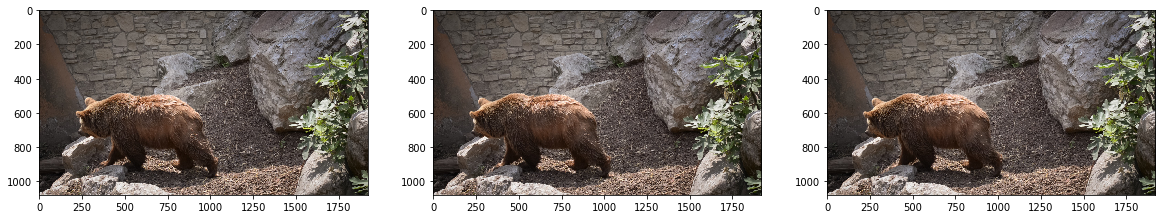

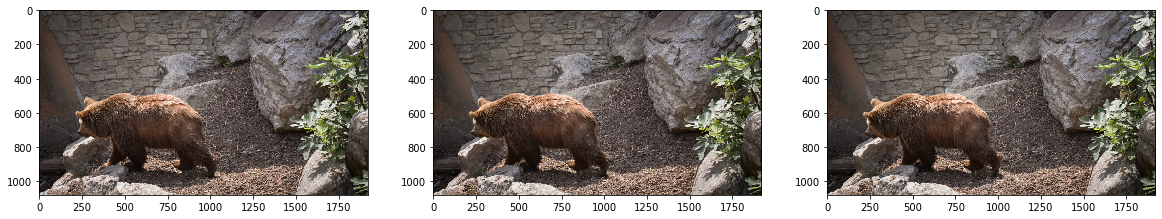

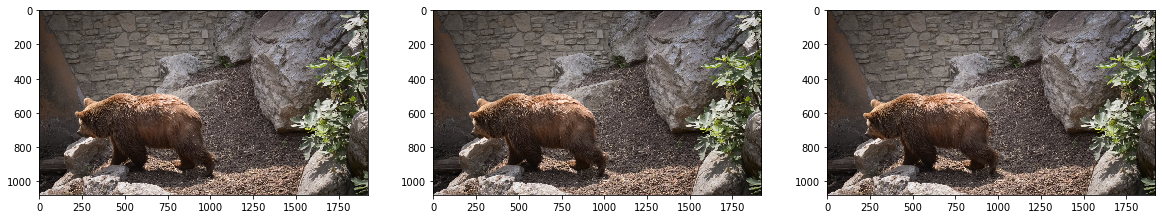

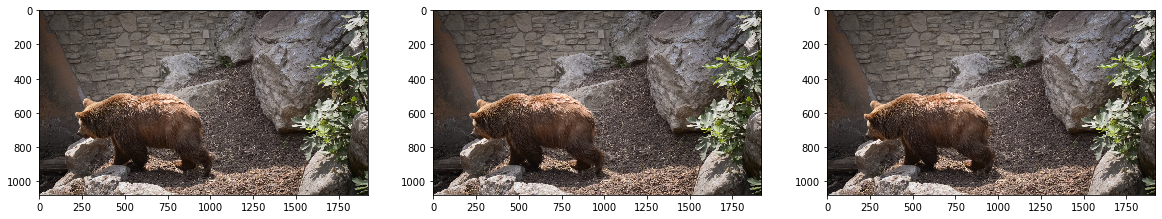

KeyboardInterrupt: 

In [4]:
image_path = "/home/z3u5/Downloads/DAVIS-2017-Unsupervised-trainval-Full-Resolution/DAVIS/JPEGImages/Full-Resolution"
image_path_sp = image_path+"/bear"
for i in range(len(os.listdir(image_path_sp))-2):
    items = sorted(os.listdir(image_path_sp))[i:i+3]
    im1 = image.imread(image_path_sp+"/"+items[0])
    im2 = image.imread(image_path_sp+"/"+items[1])
    im3 = image.imread(image_path_sp+"/"+items[2])
    ims = [im1,im2,im3]
    w=20
    h=20
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        img = ims[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

In [ ]:
print(sorted(os.listdir(image_path_sp)))

In [ ]:
path_of_images = [image_path_sp+"/"+item for item in sorted(os.listdir(image_path_sp))]

In [ ]:
print(path_of_images)

In [ ]:
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

tfrecords_filename ='bear_images.tfrecords'

writer = tf.io.TFRecordWriter(tfrecords_filename)
for i in range(len(path_of_images)-2):
    img_paths = path_of_images[i:i+3]
#     img1 = np.array(Image.open(img_paths[0]))
#     img2 = np.array(Image.open(img_paths[1]))
#     img3 = np.array(Image.open(img_paths[2]))
    
    # The reason to store image sizes was demonstrated
    # in the previous example -- we have to know sizes
    # of images to later read raw serialized string,
    # convert to 1d array and convert to respective
    # shape that image used to have.
    
    # Put in the original images into array
    # Just for future check for correctness
#     original_images.append((img, annotation))
    img_raw1 = open(img_paths[0],'rb').read()
    img_raw2 = open(img_paths[1],'rb').read()
    img_raw3 = open(img_paths[2],'rb').read()
    rows = np.array(Image.open(img_paths[0])).shape[0]
    cols = np.array(Image.open(img_paths[0])).shape[1]
#     annotation_raw = annotation.tostring()
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'img1': _bytes_feature(img_raw1),
        'img2': _bytes_feature(img_raw2),
        'img3': _bytes_feature(img_raw3),
        'height': _int64_feature(rows),
        'width': _int64_feature(cols)}))

    writer.write(example.SerializeToString())

writer.close()

In [4]:
def decode_image(image_data,height,width):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [height,width, -1]) # explicit size needed for TPU
    return image

In [8]:
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "img1": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "img2": tf.io.FixedLenFeature([], tf.string),
        "img3": tf.io.FixedLenFeature([], tf.string),
        'height': tf.io.FixedLenFeature([], tf.int64),
        'width': tf.io.FixedLenFeature([], tf.int64)
        # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    height = tf.cast(example['height'], tf.int32)
    width = tf.cast(example['width'], tf.int32)
    img1 = decode_image(example['img1'],height,width)
    img2 = decode_image(example['img2'],height,width)
    img3 = decode_image(example['img3'],height,width)

    return img1,img2,img3,height,width

# decoding a tf.data.TFRecordDataset
# dataset = tf.data.TFRecordDataset(tfrecords_filename)
# dataset = dataset.map(read_labeled_tfrecord)

In [ ]:
print(dataset)

In [ ]:
for image_features in dataset.take(4):
    w=20
    h=20
    fig=plt.figure(figsize=(20, 20))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        img = image_features[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    

In [ ]:
"""
start from here
"""

In [2]:
images_path = glob.glob("/home/z3u5/Desktop/dataset/*.jpg")
print(len(images_path))

44730


In [3]:
tf_record_file_number = 0
tf_record_base_name = "patches"
tf_record_file_path = "/home/z3u5/Desktop/tfrecords/"+tf_record_base_name+str(tf_record_file_number)+".tfrecord"
example_number = 0
for i in range(4):
    write_to_tfrecord(tf_record_file_path,images_path,example_number,examples_per_tfrecord=2500)
    tf_record_file_number += 1
    tf_record_file_path = "/home/z3u5/Desktop/tfrecords/"+tf_record_base_name+str(tf_record_file_number)+".tfrecord"
    example_number += 2500

In [19]:
dataset = tf.data.TFRecordDataset("/home/z3u5/Desktop/tfrecords/patches3.tfrecord")
dataset = dataset.map(read_labeled_tfrecord)
dataset = dataset.shuffle(2500)

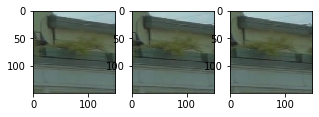

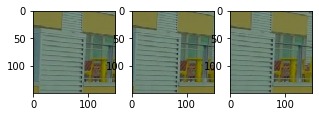

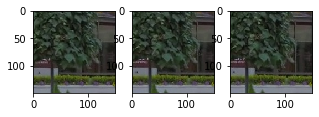

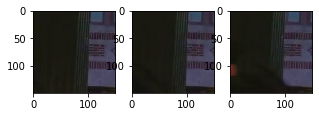

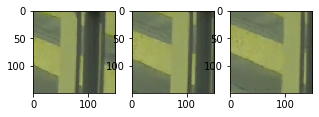

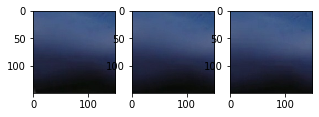

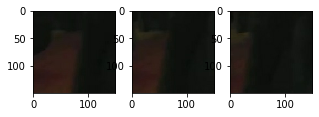

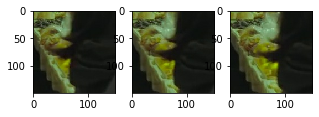

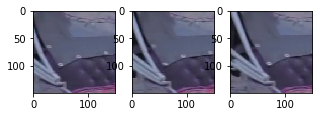

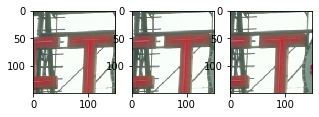

In [21]:
for image_features in dataset.take(10):
    w=20
    h=20
    fig=plt.figure(figsize=(5, 5))
    columns = 3
    rows = 1
    for i in range(1, columns*rows +1):
        img = image_features[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    